In [9]:
import pandas as pd

# Create a sample data frame
data = {
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [24, 27, 22],
    "Score": [88, 92, 95]
}
df = pd.DataFrame(data)

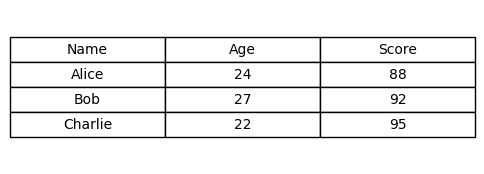

In [10]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 2))  # Adjust figure size as needed
ax.axis('off')  # Hide the axes

# Create a table with matplotlib
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
table.scale(1, 1.5)  # Adjust the scale of the table

# Save the table as an image
plt.savefig("dataframe_matplotlib.png")

In [30]:
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd

# Create a data frame with fake data
#df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })
json = {'kube-system': {'cpuEfficiency': '4.40', 'ramEfficiency': '72.68', 'totalEfficiency': '10.50', 'totalCost': '1.55'}, 'vcluster-opa-costa-aks': {'cpuEfficiency': '1.99', 'ramEfficiency': '46.36', 'totalEfficiency': '4.82', 'totalCost': '1.43'}, 'vcluster-dima-vcluster-costa-aks': {'cpuEfficiency': '12.39', 'ramEfficiency': '575.44', 'totalEfficiency': '137.02', 'totalCost': '0.25'}, 'vcluster-costa-test': {'cpuEfficiency': '18.00', 'ramEfficiency': '366.14', 'totalEfficiency': '71.74', 'totalCost': '0.22'}, 'vcluster-costa-pro-test': {'cpuEfficiency': '17.24', 'ramEfficiency': '344.50', 'totalEfficiency': '65.71', 'totalCost': '0.22'}, 'loft-default-v-vcluster-4nxxd': {'cpuEfficiency': '7.84', 'ramEfficiency': '133.94', 'totalEfficiency': '16.58', 'totalCost': '0.18'}, 'vcluster-platform': {'cpuEfficiency': '8.08', 'ramEfficiency': '163.24', 'totalEfficiency': '20.31', 'totalCost': '0.17'}, 'dagger': {'cpuEfficiency': '100.00', 'ramEfficiency': '100.00', 'totalEfficiency': '100.00', 'totalCost': '0.03'}, 'kubiya': {'cpuEfficiency': '100.00', 'ramEfficiency': '100.00', 'totalEfficiency': '100.00', 'totalCost': '0.03'}, 'default': {'cpuEfficiency': '100.00', 'ramEfficiency': '100.00', 'totalEfficiency': '100.00', 'totalCost': '0.03'}, 'opencost': {'cpuEfficiency': '2.66', 'ramEfficiency': '54.69', 'totalEfficiency': '14.22', 'totalCost': '0.03'}, 'prometheus-system': {'cpuEfficiency': '100.00', 'ramEfficiency': '100.00', 'totalEfficiency': '100.00', 'totalCost': '0.03'}, '__unmounted__': {'cpuEfficiency': '0.00', 'ramEfficiency': '0.00', 'totalEfficiency': '0.00', 'totalCost': '0.01'}, 'opencost-exporter': {'cpuEfficiency': '0.00', 'ramEfficiency': '0.00', 'totalEfficiency': '0.00', 'totalCost': '0.01'}}
df = pd.DataFrame.from_dict(json, orient='index')

# df = pd.DataFrame(json).T
df.head()

,cpuEfficiency,ramEfficiency,totalEfficiency,totalCost
kube-system,4.40,72.68,10.50,1.55
vcluster-opa-costa-aks,1.99,46.36,4.82,1.43
vcluster-dima-vcluster-costa-aks,12.39,575.44,137.02,0.25
vcluster-costa-test,18.00,366.14,71.74,0.22
vcluster-costa-pro-test,17.24,344.50,65.71,0.22


In [31]:

# Remove percentage and dollar signs, and convert to numeric
df['cpuEfficiency'] = df['cpuEfficiency'].replace('%', '').astype(float)
df['ramEfficiency'] = df['ramEfficiency'].str.replace('%', '').astype(float)
df['totalEfficiency'] = df['totalEfficiency'].str.replace('%', '').astype(float)
df['totalCost'] = df['totalCost'].str.replace('', '').astype(float)

# plot it
# Reset the index if you want 'namespace' as a column
df = df.reset_index().rename(columns={'index': 'namespace'})

df


,namespace,cpuEfficiency,ramEfficiency,totalEfficiency,totalCost
0,kube-system,4.40,72.68,10.50,1.55
1,vcluster-opa-costa-aks,1.99,46.36,4.82,1.43
2,vcluster-dima-vcluster-costa-aks,12.39,575.44,137.02,0.25
3,vcluster-costa-test,18.00,366.14,71.74,0.22
4,vcluster-costa-pro-test,17.24,344.50,65.71,0.22
5,loft-default-v-vcluster-4nxxd,7.84,133.94,16.58,0.18
6,vcluster-platform,8.08,163.24,20.31,0.17
7,dagger,100.00,100.00,100.00,0.03
8,kubiya,100.00,100.00,100.00,0.03
9,default,100.00,100.00,100.00,0.03


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

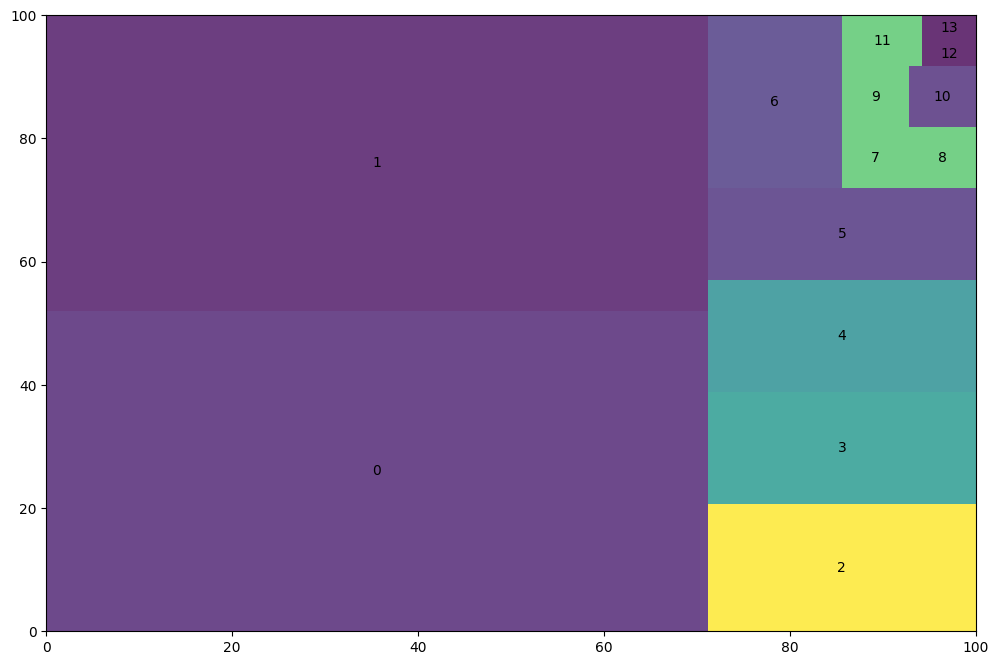

In [40]:
import matplotlib.cm as cm

# Generate colors based on totalEfficiency values
norm = plt.Normalize(df['totalEfficiency'].min(), df['totalEfficiency'].max())
colors = cm.viridis(norm(df['totalEfficiency']))

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=df['totalCost'], label=df.index, color=colors, alpha=.8)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), label="Total Efficiency (%)")
plt.axis('off')
plt.title('Namespace Cost and Efficiency Treemap')
    plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

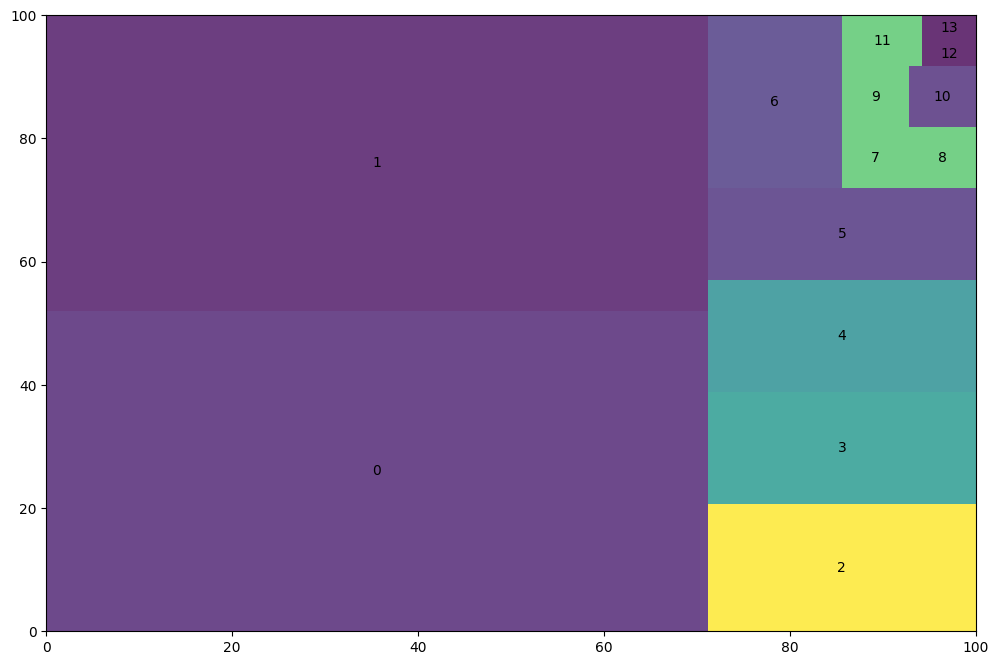

In [41]:
# Generate colors based on totalEfficiency values
norm = plt.Normalize(df['totalEfficiency'].min(), df['totalEfficiency'].max())
colors = cm.viridis(norm(df['totalEfficiency']))

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=df['totalCost'], label=df.index, color=colors, alpha=.8)

# Create a ScalarMappable and add color bar
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # Empty array for ScalarMappable
plt.colorbar(sm, label="Total Efficiency (%)")

plt.axis('off')
plt.title('Namespace Cost and Efficiency Treemap')
plt.show()

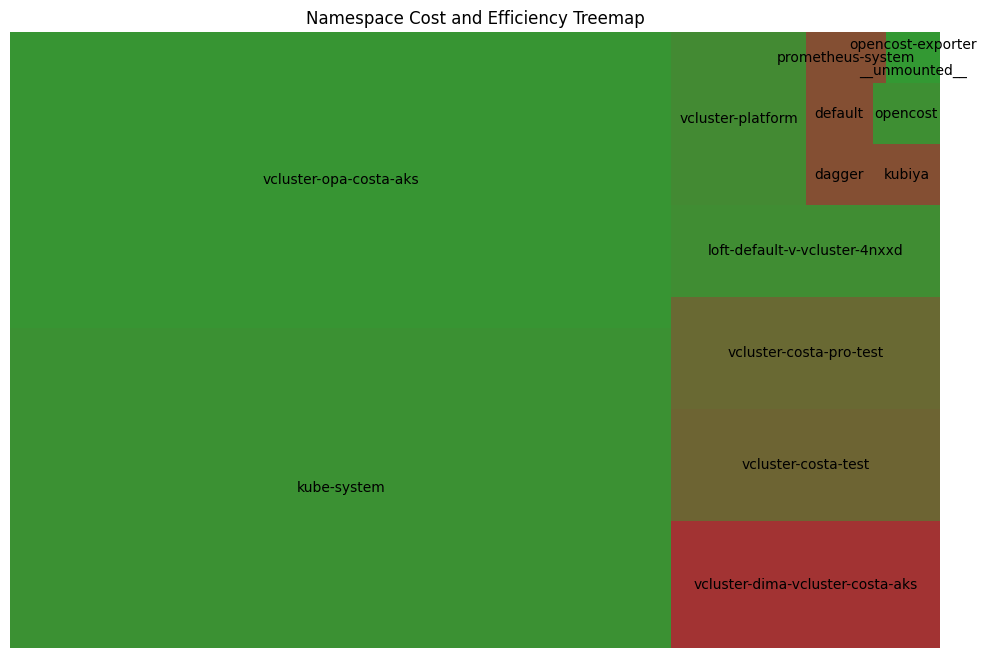

In [55]:
import pandas as pd
import squarify
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# JSON data
json_data = {
    'kube-system': {'cpuEfficiency': '4.40%', 'ramEfficiency': '72.68%', 'totalEfficiency': '10.50%', 'totalCost': '$1.55'},
    'vcluster-opa-costa-aks': {'cpuEfficiency': '1.99%', 'ramEfficiency': '46.36%', 'totalEfficiency': '4.82%', 'totalCost': '$1.43'},
    'vcluster-dima-vcluster-costa-aks': {'cpuEfficiency': '12.39%', 'ramEfficiency': '575.44%', 'totalEfficiency': '137.02%', 'totalCost': '$0.25'},
    'vcluster-costa-test': {'cpuEfficiency': '18.00%', 'ramEfficiency': '366.14%', 'totalEfficiency': '71.74%', 'totalCost': '$0.22'},
    'vcluster-costa-pro-test': {'cpuEfficiency': '17.24%', 'ramEfficiency': '344.50%', 'totalEfficiency': '65.71%', 'totalCost': '$0.22'},
    'loft-default-v-vcluster-4nxxd': {'cpuEfficiency': '7.84%', 'ramEfficiency': '133.94%', 'totalEfficiency': '16.58%', 'totalCost': '$0.18'},
    'vcluster-platform': {'cpuEfficiency': '8.08%', 'ramEfficiency': '163.24%', 'totalEfficiency': '20.31%', 'totalCost': '$0.17'},
    'dagger': {'cpuEfficiency': '100.00%', 'ramEfficiency': '100.00%', 'totalEfficiency': '100.00%', 'totalCost': '$0.03'},
    'kubiya': {'cpuEfficiency': '100.00%', 'ramEfficiency': '100.00%', 'totalEfficiency': '100.00%', 'totalCost': '$0.03'},
    'default': {'cpuEfficiency': '100.00%', 'ramEfficiency': '100.00%', 'totalEfficiency': '100.00%', 'totalCost': '$0.03'},
    'opencost': {'cpuEfficiency': '2.66%', 'ramEfficiency': '54.69%', 'totalEfficiency': '14.22%', 'totalCost': '$0.03'},
    'prometheus-system': {'cpuEfficiency': '100.00%', 'ramEfficiency': '100.00%', 'totalEfficiency': '100.00%', 'totalCost': '$0.03'},
    '__unmounted__': {'cpuEfficiency': '0.00%', 'ramEfficiency': '0.00%', 'totalEfficiency': '0.00%', 'totalCost': '$0.01'},
    'opencost-exporter': {'cpuEfficiency': '0.00%', 'ramEfficiency': '0.00%', 'totalEfficiency': '0.00%', 'totalCost': '$0.01'}
}

# Convert JSON to DataFrame
df = pd.DataFrame.from_dict(json_data, orient='index')

# Remove percentage and dollar signs, and convert to numeric
df['cpuEfficiency'] = df['cpuEfficiency'].str.replace('%', '').astype(float)
df['ramEfficiency'] = df['ramEfficiency'].str.replace('%', '').astype(float)
df['totalEfficiency'] = df['totalEfficiency'].str.replace('%', '').astype(float)
df['totalCost'] = df['totalCost'].str.replace('$', '').astype(float)

# Create a green-to-dark-red colormap
cmap = mcolors.LinearSegmentedColormap.from_list("green_red", ["green", "darkred"])

# Normalize based on totalEfficiency values
norm = plt.Normalize(df['totalEfficiency'].min(), df['totalEfficiency'].max())
colors = cmap(norm(df['totalEfficiency']))

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=df['totalCost'], label=df.index, color=colors, alpha=.8)

# Create a ScalarMappable for color bar
# sm = mcolors.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# plt.colorbar(sm, label="Total Efficiency (%)")
# 
plt.axis('off')
plt.title('Namespace Cost and Efficiency Treemap')
# 
# # Save the plot as an image
plt.savefig("namespace_treemap.png", format="png", dpi=300, bbox_inches="tight")
# 
# # Show the plot
plt.show()


In [63]:
import pandas as pd
import plotly.express as px
import numpy as np

# JSON data
json_data = {
    'kube-system': {'cpuEfficiency': '4.40%', 'ramEfficiency': '72.68%', 'totalEfficiency': '10.50%', 'totalCost': '$1.55'},
    'vcluster-opa-costa-aks': {'cpuEfficiency': '1.99%', 'ramEfficiency': '46.36%', 'totalEfficiency': '4.82%', 'totalCost': '$1.43'},
    'vcluster-dima-vcluster-costa-aks': {'cpuEfficiency': '12.39%', 'ramEfficiency': '575.44%', 'totalEfficiency': '137.02%', 'totalCost': '$0.25'},
    'vcluster-costa-test': {'cpuEfficiency': '18.00%', 'ramEfficiency': '366.14%', 'totalEfficiency': '71.74%', 'totalCost': '$0.22'},
    'vcluster-costa-pro-test': {'cpuEfficiency': '17.24%', 'ramEfficiency': '344.50%', 'totalEfficiency': '65.71%', 'totalCost': '$0.22'},
    'loft-default-v-vcluster-4nxxd': {'cpuEfficiency': '7.84%', 'ramEfficiency': '133.94%', 'totalEfficiency': '16.58%', 'totalCost': '$0.18'},
    'vcluster-platform': {'cpuEfficiency': '8.08%', 'ramEfficiency': '163.24%', 'totalEfficiency': '20.31%', 'totalCost': '$0.17'},
    'dagger': {'cpuEfficiency': '100.00%', 'ramEfficiency': '100.00%', 'totalEfficiency': '100.00%', 'totalCost': '$0.03'},
    'kubiya': {'cpuEfficiency': '100.00%', 'ramEfficiency': '100.00%', 'totalEfficiency': '100.00%', 'totalCost': '$0.03'},
    'default': {'cpuEfficiency': '100.00%', 'ramEfficiency': '100.00%', 'totalEfficiency': '100.00%', 'totalCost': '$0.03'},
    'opencost': {'cpuEfficiency': '2.66%', 'ramEfficiency': '54.69%', 'totalEfficiency': '14.22%', 'totalCost': '$0.03'},
    'prometheus-system': {'cpuEfficiency': '100.00%', 'ramEfficiency': '100.00%', 'totalEfficiency': '100.00%', 'totalCost': '$0.03'},
    '__unmounted__': {'cpuEfficiency': '0.00%', 'ramEfficiency': '0.00%', 'totalEfficiency': '0.00%', 'totalCost': '$0.01'},
    'opencost-exporter': {'cpuEfficiency': '0.00%', 'ramEfficiency': '0.00%', 'totalEfficiency': '0.00%', 'totalCost': '$0.01'}
}

# Convert JSON to DataFrame
df = pd.DataFrame.from_dict(json_data, orient='index').reset_index().rename(columns={'index': 'namespace'})

# Remove percentage and dollar signs, and convert to numeric
df['cpuEfficiency'] = df['cpuEfficiency'].str.replace('%', '').astype(float)
df['ramEfficiency'] = df['ramEfficiency'].str.replace('%', '').astype(float)
df['totalEfficiency'] = df['totalEfficiency'].str.replace('%', '').astype(float)
df['totalCost'] = df['totalCost'].str.replace('$', '').astype(float)

# Create the treemap using Plotly
fig = px.treemap(
    df,
    path=[px.Constant("Namespaces"), 'namespace'],  # Hierarchical path
    values='totalCost',                             # Block size based on total cost
    color='totalEfficiency',                        # Color based on total efficiency
    hover_data={'cpuEfficiency': True, 'ramEfficiency': True},  # Additional hover info
    color_continuous_scale='RdYlGn',                # Green to red color scale
    color_continuous_midpoint=np.average(df['totalEfficiency'], weights=df['totalCost'])
)

# Update layout
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25), title='Namespace Cost and Efficiency Treemap')

# Save the figure as a PNG image
fig.write_image("namespace_treemap.png")

# Display the figure
fig.show()

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
